In [3]:
import os 
from pathlib import Path

In [5]:
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
print(github_folder)

/Users/ppower1/Documents/GitHub


In [6]:

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-dark-palette')

from matplotlib import font_manager 
locations = github_folder + '/evictions/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"


from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as mtick 

def format_date(x, pos=None):
    month_year = mdates.num2date(x).strftime('%b\n%Y')
    if  mdates.num2date(x).month == 1:
        return month_year
    else:
        return  mdates.num2date(x).strftime('%b')

/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader
/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader/static/Newsreader_36pt/Newsreader_36pt-ExtraLightItalic.ttf


/var/folders/3l/12mcyxkx38jdv4zv_hxngvtw0000gn/T/ipykernel_16786/1796677897.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


#### **Table 6.5**

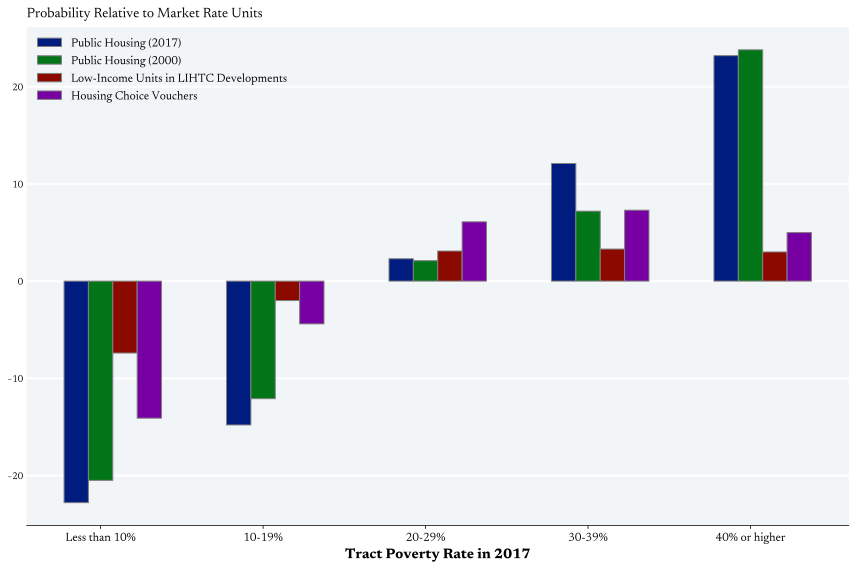

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the data has been extracted from the image and is available in the same order as in the image
# Tract Poverty Rate Categories
categories = ['Less than 10%', '10-19%', '20-29%', '30-39%', '40% or higher']

# Percent values for each housing type for 2017 and 2000
public_housing_2017 = np.array([6.0, 18.7, 21.8, 22.4, 31.1]) -  np.array([28.8, 33.5, 19.5, 10.3, 7.9])
public_housing_2000 = np.array([8.3, 21.4, 21.6, 17.5, 31.7]) -  np.array([28.8, 33.5, 19.5, 10.3, 7.9])
low_income_lihtc = np.array([21.4, 31.5, 22.6, 13.6, 10.9]) -  np.array([28.8, 33.5, 19.5, 10.3, 7.9])
housing_choice_vouchers = np.array([14.7, 29.1, 25.6, 17.6, 12.9]) -  np.array([28.8, 33.5, 19.5, 10.3, 7.9])

# Number of category groups
num_categories = len(categories)

# Creating a figure and a set of subplots
fig = plt.figure(dpi=300, tight_layout=True, figsize=(12, 8))
ax = plt.axes(facecolor=(.95, .96, .97))

# Plot customizations
for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.02, s='Probability Relative to Market Rate Units', transform=ax.transAxes, size=14)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)


# Set position of bar on X axis
barWidth = 0.15
r1 = np.arange(num_categories)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Make the plot
ax.bar(r1, public_housing_2017,   width=barWidth, edgecolor='grey', label='Public Housing (2017)')
ax.bar(r2, public_housing_2000,  width=barWidth, edgecolor='grey', label='Public Housing (2000)')
ax.bar(r3, low_income_lihtc,   width=barWidth, edgecolor='grey', label='Low-Income Units in LIHTC Developments')
ax.bar(r4, housing_choice_vouchers,   width=barWidth, edgecolor='grey', label='Housing Choice Vouchers')

# Add xticks on the middle of the group bars
ax.set_xlabel('Tract Poverty Rate in 2017', fontweight='bold', size=14)
ax.set_xticks([r + barWidth for r in range(num_categories)])
ax.set_xticklabels(categories)

# Create legend & Show graphic
plt.legend(frameon=False, fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()